In [1]:
import torch
from torchvision import datasets, transforms #to prepare and load image data and 
from torch.utils.data import DataLoader # to feed it efficiently into a model
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Transform pipeline
transform_pipeline = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.5], std = [0.5])
])

In [3]:
# Dataset paths
base_dir = Path("../data/chest_xray")

# Load Images and Apply Transforms Using ImageFolder
train_data = datasets.ImageFolder(root = base_dir / "train", transform = transform_pipeline)
test_data  = datasets.ImageFolder(root = base_dir / "test",  transform = transform_pipeline)
val_data   = datasets.ImageFolder(root = base_dir / "val",   transform = transform_pipeline)

# Define class names for later use
class_names = train_data.classes

In [4]:
# Check labels
print(class_names)
print(train_data.class_to_idx)

['NORMAL', 'PNEUMONIA']
{'NORMAL': 0, 'PNEUMONIA': 1}


In [5]:
# Wrap Datasets into DataLoaders
train_loader = DataLoader (train_data, batch_size = 32, shuffle = True)
test_loader  = DataLoader (test_data,  batch_size = 32)
val_loader   = DataLoader (val_data,   batch_size = 32)

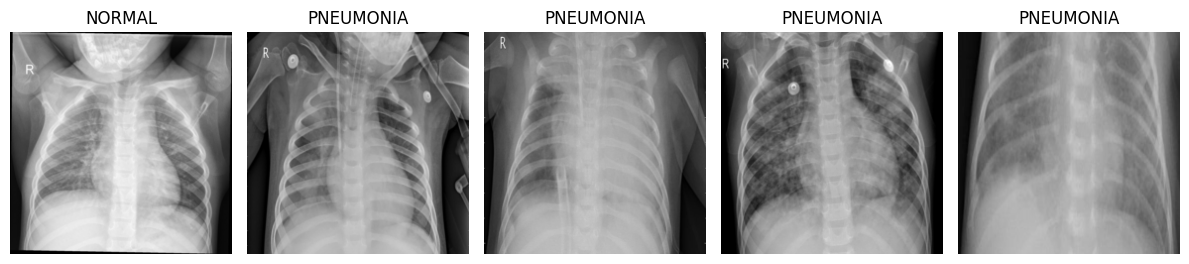

In [6]:
# Unnormalize and display a single grayscale image tensor
def imshow(img_tensor):
    # Convert from CHW to HWC format for matplotlib
    img = img_tensor.permute(1, 2, 0)

    # Unnormalize (mean = 0.5, std = 0.5 applied to all 3 channels)
    img = img * 0.5 + 0.5

    # Clamp (limit) pixel values to the range [0, 1] for valid display
    img = img.clip(0, 1)

    # Display grayscale image (optional grayscale colormap for grayscale images)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# Sample batch from DataLoader
images, labels = next(iter(train_loader))

# Show the first 5 images
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    imshow(images[i])
    plt.title(class_names[labels[i].item()])
plt.tight_layout()
plt.show()